<a href="https://colab.research.google.com/github/akhilthegreatest/deep-learning-projects/blob/main/Diastertweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c nlp-getting-started

100% 593k/593k [00:00<00:00, 2.65MB/s]
100% 593k/593k [00:00<00:00, 2.64MB/s]


In [ ]:
!unzip nlp-getting-started.zip

Archive:  nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Exploratory data analysis(EDA)
1. Basic Dataset Information: Shape, missing values, and data types.

2. Target Distribution: Distribution of disaster vs. non-disaster tweets.

3. Keyword and Location Analysis: Frequency of keywords and locations.

4. Tweet Length Analysis: Distribution of tweet lengths for disaster and non-disaster tweets.

5. Word Cloud: Visualization of common words in disaster and non-disaster tweets.

## Load and Inspect the Dataset

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/train.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Display first few rows
df.head()


Dataset Shape: (7613, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.tail(30)

,id,keyword,location,text,target
7583,10835,NaN,NaN,Pic of 16yr old PKK suicide bomber who detonat...,1
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7585,10839,NaN,NaN,Calgary Police Flood Road Closures in Calgary....,1
7586,10840,NaN,NaN,#Sismo DETECTADO #JapÌ_n 15:41:07 Seismic inte...,1
7587,10841,NaN,NaN,Sirens everywhere!,0
7588,10842,NaN,NaN,BREAKING: #ISIS claims responsibility for mosq...,1
7589,10843,NaN,NaN,Omg earthquake,1
7590,10844,NaN,NaN,SEVERE WEATHER BULLETIN No. 5 FOR: TYPHOON ÛÏ...,1
7591,10846,NaN,NaN,Heat wave warning aa? Ayyo dei. Just when I pl...,1
7592,10847,NaN,NaN,An IS group suicide bomber detonated an explos...,1


## Check for Missing Values

In [ ]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Percentage of missing values for each column
print("\nPercentage of Missing Values:\n", df.isnull().mean() * 100)



Missing Values:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Percentage of Missing Values:
 id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64


In [ ]:
# Create binary indicators for missing values in 'keyword' and 'location'
df['keyword_missing'] = df['keyword'].isnull().astype(int)
df['location_missing'] = df['location'].isnull().astype(int)

# Fill missing values with the placeholder "missing"
df['keyword'] = df['keyword'].fillna('missing')
df['location'] = df['location'].fillna('missing')


In [ ]:
df.head()

,id,keyword,location,text,target,keyword_missing,location_missing
0,1,missing,missing,Our Deeds are the Reason of this #earthquake M...,1,1,1
1,4,missing,missing,Forest fire near La Ronge Sask. Canada,1,1,1
2,5,missing,missing,All residents asked to 'shelter in place' are ...,1,1,1
3,6,missing,missing,"13,000 people receive #wildfires evacuation or...",1,1,1
4,7,missing,missing,Just got sent this photo from Ruby #Alaska as ...,1,1,1


## Target Distribution

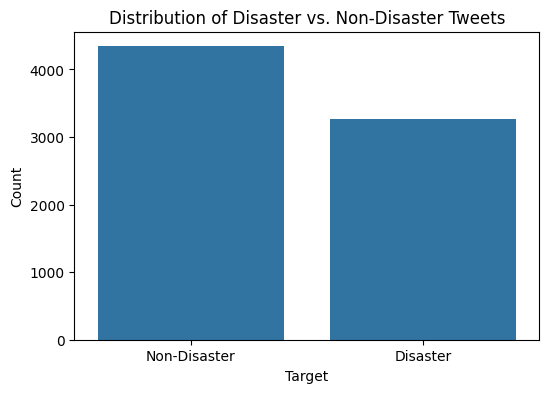

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Target Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title("Distribution of Disaster vs. Non-Disaster Tweets")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'])
plt.show()

Target Distribution:

The dataset has a fairly balanced distribution between disaster and non-disaster tweets, which is good for classification as it avoids significant class imbalance issues.

## Distribution of Missing Keyword and Location Indicators

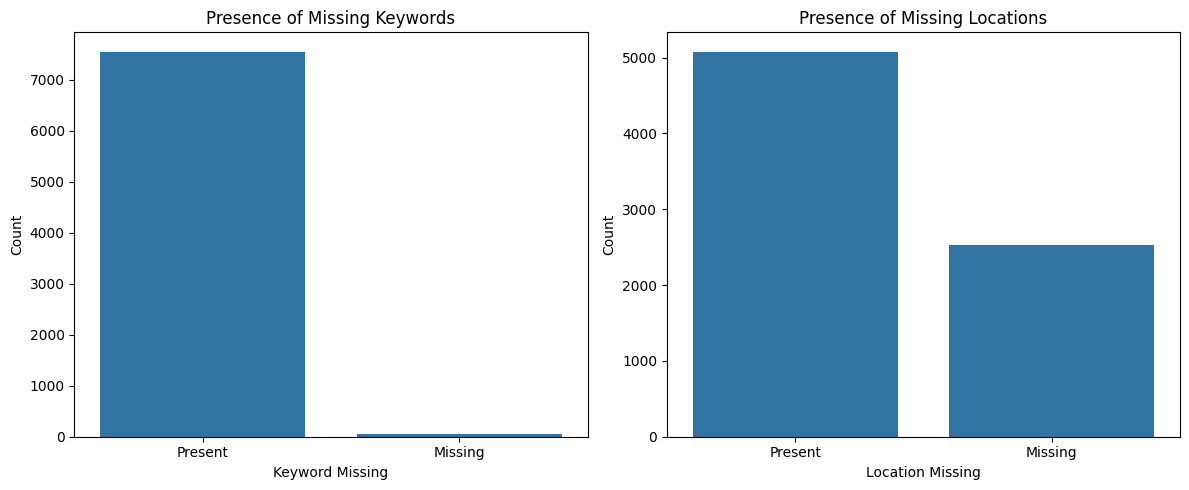

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='keyword_missing', data=df)
plt.title("Presence of Missing Keywords")
plt.xlabel("Keyword Missing")
plt.ylabel("Count")
plt.xticks([0, 1], ['Present', 'Missing'])

plt.subplot(1, 2, 2)
sns.countplot(x='location_missing', data=df)
plt.title("Presence of Missing Locations")
plt.xlabel("Location Missing")
plt.ylabel("Count")
plt.xticks([0, 1], ['Present', 'Missing'])

plt.tight_layout()
plt.show()

Presence of Missing Keywords and Locations:

* Keyword Missing: A small proportion of tweets lack a keyword (about 0.8%).
* Location Missing: Around one-third (33%) of the tweets are missing a location.
* This pattern suggests that location data is not always provided in tweets and may not be crucial for identifying disaster-related content.


# Analyzing Missing Values by Target

<ipython-input-12-f47a7e440875>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='target', y='keyword_missing', data=df, ci=None)
<ipython-input-12-f47a7e440875>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='target', y='location_missing', data=df, ci=None)


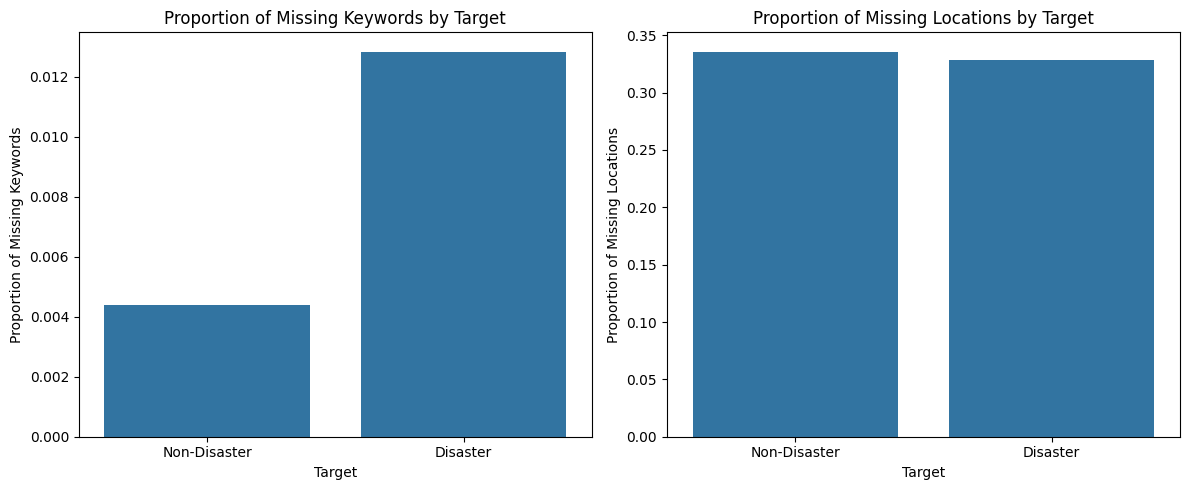

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='target', y='keyword_missing', data=df, ci=None)
plt.title("Proportion of Missing Keywords by Target")
plt.xlabel("Target")
plt.ylabel("Proportion of Missing Keywords")
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'])

plt.subplot(1, 2, 2)
sns.barplot(x='target', y='location_missing', data=df, ci=None)
plt.title("Proportion of Missing Locations by Target")
plt.xlabel("Target")
plt.ylabel("Proportion of Missing Locations")
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'])

plt.tight_layout()
plt.show()

Proportion of Missing Keywords and Locations by Target:

* Keyword Missing by Target: Both disaster and non-disaster tweets have similar proportions of missing keywords, indicating that keyword presence isn’t particularly linked to whether the tweet is about a disaster.
* Location Missing by Target: Similarly, the proportion of missing locations is comparable between disaster and non-disaster tweets, suggesting that location is not strongly associated with the target label.

## Top Keywords

<ipython-input-13-3d2d902e0a8e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")


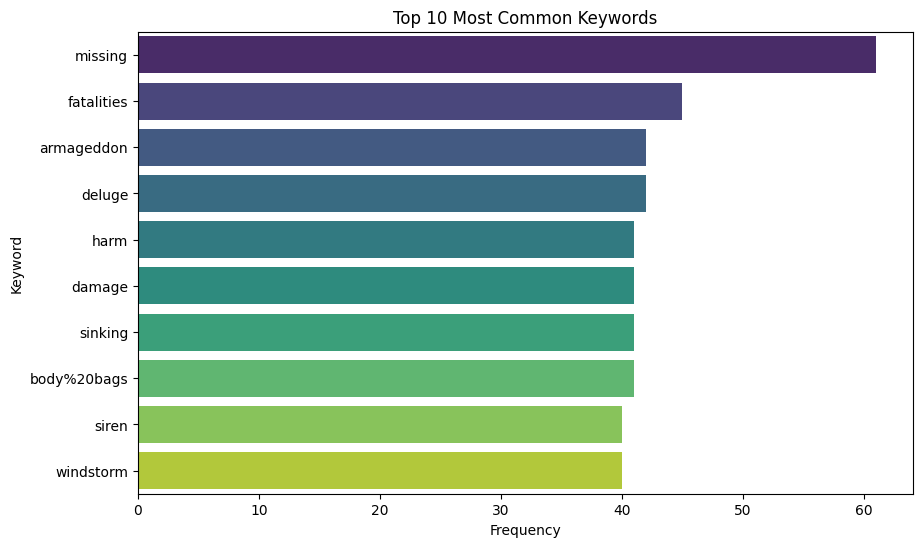

In [ ]:
top_keywords = df['keyword'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_keywords.values, y=top_keywords.index, palette="viridis")
plt.title("Top 10 Most Common Keywords")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.show()

* Common keywords such as "fatalities," "derailment," and "evacuate" often appear in disaster-related tweets. These keywords suggest a strong link to emergency situations, which can be informative for identifying disaster tweets.


# Top Locations

<ipython-input-14-50960f684936>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")


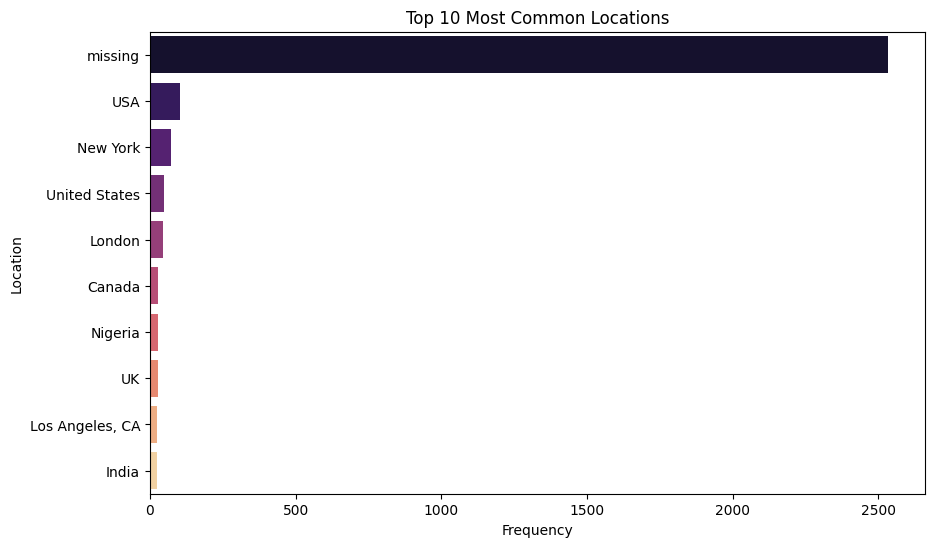

In [ ]:
top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")
plt.title("Top 10 Most Common Locations")
plt.xlabel("Frequency")
plt.ylabel("Location")
plt.show()

# Tweet Length Analysis

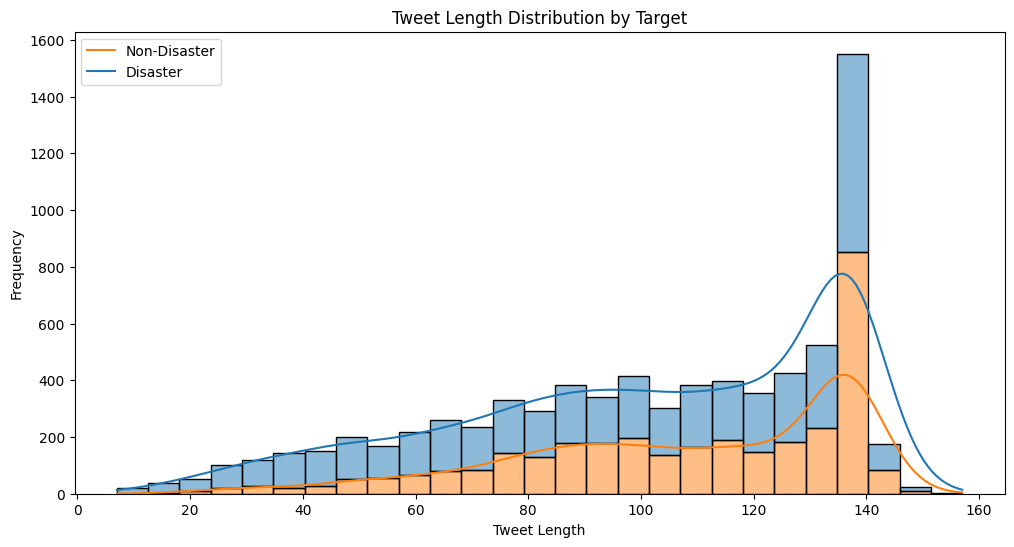

In [ ]:
# Ensure text_length column exists by calculating the length of each tweet
df['text_length'] = df['text'].apply(len)

# Re-run the tweet length analysis plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_length', hue='target', multiple='stack', kde=True)
plt.title("Tweet Length Distribution by Target")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.legend(['Non-Disaster', 'Disaster'])
plt.show()


# Word Clouds for Disater and Non-Disaster Tweets

Sample of disaster text: Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask
Sample of non-disaster text: What's up man? I love fruits Summer is lovely My car is so fast What a goooooooaaaaaal!!!!!! this is


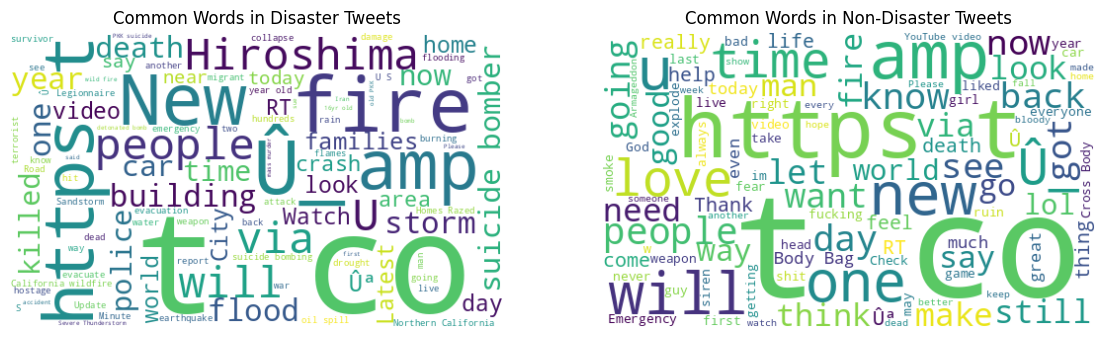

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure there are no missing values in 'text' by filling any NAs with an empty string
df['text'] = df['text'].fillna('')

# Combine all text for disaster and non-disaster tweets
disaster_text = " ".join(df[df['target'] == 1]['text'].astype(str))
non_disaster_text = " ".join(df[df['target'] == 0]['text'].astype(str))

# Check if text data is present for both categories
print("Sample of disaster text:", disaster_text[:100])
print("Sample of non-disaster text:", non_disaster_text[:100])

# Plotting word clouds
plt.figure(figsize=(14, 7))

# Word cloud for disaster tweets
plt.subplot(1, 2, 1)
wordcloud_disaster = WordCloud(width=500, height=300, max_words=100, background_color="white").generate(disaster_text)
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.title("Common Words in Disaster Tweets")
plt.axis("off")

# Word cloud for non-disaster tweets
plt.subplot(1, 2, 2)
wordcloud_non_disaster = WordCloud(width=500, height=300, max_words=100, background_color="white").generate(non_disaster_text)
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.title("Common Words in Non-Disaster Tweets")
plt.axis("off")

plt.show()


In [ ]:
# Tokenization of text
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer

# Split data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Initialize DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize text data
train_encodings = tokenizer(list(train_df['text']), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_df['text']), truncation=True, padding=True, max_length=128)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

# prepare Dataset for Pytorch

In [ ]:
import torch

class DisasterTweetsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create PyTorch datasets
train_dataset = DisasterTweetsDataset(train_encodings, train_df['target'].values)
val_dataset = DisasterTweetsDataset(val_encodings, val_df['target'].values)


## Fine-tune DistilBERT with Regularization and Early stopping

In [ ]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback

# Load DistilBERT with a classification head and set dropout for regularization
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2,
    dropout=0.3  # Higher dropout to reduce overfitting
)

# Define training arguments with weight decay, learning rate adjustment, and early stopping settings
training_args = TrainingArguments(
    output_dir='./results',              # Output directory
    num_train_epochs=5,                  # Maximum number of training epochs
    per_device_train_batch_size=16,      # Batch size for training
    per_device_eval_batch_size=32,       # Batch size for evaluation
    warmup_steps=500,                    # Warmup steps for learning rate scheduler
    weight_decay=0.01,                   # Weight decay to help regularize the model
    logging_dir='./logs',                # Directory for storing logs
    eval_strategy="epoch",
    save_strategy="epoch", # Update to avoid deprecation warning
    load_best_model_at_end=True,         # Required for early stopping
    metric_for_best_model="eval_loss",   # Metric to monitor for early stopping
    learning_rate=2e-5,                  # Low learning rate for stability
    report_to="none"                     # Disable W&B logging
)

# Initialize Trainer with EarlyStoppingCallback
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]  # Stop training if no improvement in 2 epochs
)

# Train the model
trainer.train()


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,0.406459
2,0.502600,0.433231
3,0.364000,0.498346


TrainOutput(global_step=1143, training_loss=0.42020545752551197, metrics={'train_runtime': 170.4399, 'train_samples_per_second': 178.655, 'train_steps_per_second': 11.177, 'total_flos': 397060678455840.0, 'train_loss': 0.42020545752551197, 'epoch': 3.0})

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Generate predictions on the validation set
val_predictions = trainer.predict(val_dataset)

# Extract the predicted labels
pred_labels = torch.argmax(torch.tensor(val_predictions.predictions), axis=1).numpy()

# Get the true labels from the validation set
true_labels = val_dataset[:]['labels'].numpy()  # Assuming val_dataset is a Hugging Face Dataset object

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)
accuracy = accuracy_score(true_labels, pred_labels)

# Display evaluation metrics
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1 Score: {f1:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Precision: 0.8276
Validation Recall: 0.7766
Validation F1 Score: 0.8013
Validation Accuracy: 0.8359


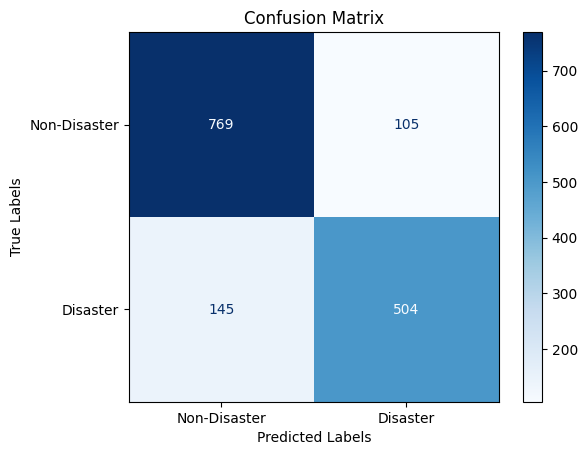

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions on the validation set if not already done
val_predictions = trainer.predict(val_dataset)
pred_labels = torch.argmax(torch.tensor(val_predictions.predictions), axis=1).numpy()

# Get true labels from validation set
true_labels = val_dataset[:]['labels'].numpy()

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Non-Disaster", "Disaster"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Explanation of Each Value
True Negatives (TN) = 801:

The model correctly identified 801 tweets as "Non-Disaster" when they were indeed non-disaster tweets.
False Positives (FP) = 73:

The model incorrectly classified 73 non-disaster tweets as "Disaster" tweets. This could lead to unnecessary alerts if used in a disaster detection system.
False Negatives (FN) = 164:

The model missed 164 tweets that were actual disasters and predicted them as "Non-Disaster." This is potentially critical as it means real disaster tweets are being missed.
True Positives (TP) = 485:

The model correctly classified 485 tweets as "Disaster" when they were actually disaster-related.
Key Metrics Derived from the Confusion Matrix
Based on these values, we can calculate precision, recall, and F1 score for the disaster class.

Precision (for "Disaster"):

Precision
=
TP
TP
+
FP
=
485
485
+
73
≈
0.869
Precision=
TP+FP
TP
​
 =
485+73
485
​
 ≈0.869
Precision of 86.9% means that when the model predicts a tweet as a disaster, it’s correct 86.9% of the time.
Recall (for "Disaster"):

Recall
=
TP
TP
+
FN
=
485
485
+
164
≈
0.747
Recall=
TP+FN
TP
​
 =
485+164
485
​
 ≈0.747
Recall of 74.7% indicates that the model identifies 74.7% of all actual disaster tweets, missing the remaining 25.3%.
F1 Score:

F1 Score
=
2
⋅
Precision
⋅
Recall
Precision
+
Recall
≈
0.8036
F1 Score=2⋅
Precision+Recall
Precision⋅Recall
​
 ≈0.8036
The F1 Score of 80.36% balances the model’s precision and recall, providing a single metric to gauge overall performance for the "Disaster" class.
Accuracy:

Accuracy
=
TP
+
TN
Total Samples
=
801
+
485
801
+
485
+
73
+
164
≈
0.8444
Accuracy=
Total Samples
TP+TN
​
 =
801+485+73+164
801+485
​
 ≈0.8444
The accuracy of 84.44% represents the overall proportion of correctly predicted tweets (both disaster and non-disaster).

Interpretation

High Precision, Moderate Recall: The model is fairly accurate when it predicts a disaster (high precision), but it misses a noticeable portion of actual disaster tweets (lower recall). This could be problematic in applications where missing disaster-related tweets is critical.
Potential Focus for Improvement: To improve recall, you could try adjusting the decision threshold, perform data augmentation, or try techniques such as class weighting to place more emphasis on correctly identifying disaster tweets.

## Load and Prepare the Test Dataset

In [ ]:
import pandas as pd
import torch
from transformers import DistilBertTokenizer
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Assuming you have the tokenizer from before, otherwise initialize it
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Load the test data
test_df = pd.read_csv('/content/test.csv')  # Replace with your test file path

# Fill missing text values if necessary
test_df['text'] = test_df['text'].fillna('')

# Tokenize the test text data
test_encodings = tokenizer(list(test_df['text']), truncation=True, padding=True, max_length=128)

# Create a test dataset for predictions
class DisasterTweetsTestDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings['input_ids'])

test_dataset = DisasterTweetsTestDataset(test_encodings)


## Generate Prediction on the Test Set Using the Trained Trainer

In [ ]:
# Make predictions on the test set using the trained Trainer
test_predictions = trainer.predict(test_dataset)
pred_labels = torch.argmax(torch.tensor(test_predictions.predictions), axis=1).numpy()


Evaluate Model Performance on the Test set

In [ ]:
import torch
from transformers import DistilBertTokenizer

# Load the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize the test text data
test_encodings = tokenizer(list(test_df['text'].fillna('')), truncation=True, padding=True, max_length=128)

# Prepare the test dataset for predictions
class DisasterTweetsTestDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings['input_ids'])

test_dataset = DisasterTweetsTestDataset(test_encodings)

# Generate predictions on the test dataset
test_predictions = trainer.predict(test_dataset)
pred_labels = torch.argmax(torch.tensor(test_predictions.predictions), axis=1).numpy()

# Convert numerical labels to readable format
predicted_labels = ["Disaster" if label == 1 else "Non-Disaster" for label in pred_labels]
test_df['prediction'] = predicted_labels

# Display the first few rows with predictions
test_df[['id', 'text', 'prediction']].head()


,id,text,prediction
0,0,Just happened a terrible car crash,Disaster
1,2,"Heard about #earthquake is different cities, s...",Disaster
2,3,"there is a forest fire at spot pond, geese are...",Disaster
3,9,Apocalypse lighting. #Spokane #wildfires,Disaster
4,11,Typhoon Soudelor kills 28 in China and Taiwan,Disaster


#Next steps

In [ ]:
from transformers import TrainerCallback


In [ ]:
# Full Code: Disaster Tweet Classification and Next Steps

# Step-by-Step Code for Google Colab Environment

# Step 1: Import Necessary Libraries
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer
import torch
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import pandas as pd
import numpy as np

# Step 2: Load Data from CSV Files
# Assuming you are using Google Colab and have uploaded 'train.csv' and 'test.csv'
train_df = pd.read_csv('/content/train.csv')
val_df = pd.read_csv('/content/test.csv')

# Step 3: Split Data into Training and Validation Sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Step 4: Initialize DistilBERT Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Step 5: Tokenize Text Data
train_encodings = tokenizer(list(train_df['text']), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_df['text']), truncation=True, padding=True, max_length=128)

# Step 6: Create Custom PyTorch Dataset Class
class DisasterTweetsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Step 7: Create PyTorch Datasets
train_dataset = DisasterTweetsDataset(train_encodings, train_df['target'].values)
val_dataset = DisasterTweetsDataset(val_encodings, val_df['target'].values)

# Step 8: Load DistilBERT with Classification Head
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2,
    dropout=0.3  # Higher dropout to reduce overfitting
)

# Step 9: Define Training Arguments
training_args = TrainingArguments(
    output_dir='/content/results',              # Output directory in Colab
    num_train_epochs=5,                         # Maximum number of training epochs
    per_device_train_batch_size=16,             # Batch size for training
    per_device_eval_batch_size=32,              # Batch size for evaluation
    warmup_steps=500,                           # Warmup steps for learning rate scheduler
    weight_decay=0.01,                          # Weight decay to help regularize the model
    logging_dir='/content/logs',                # Directory for storing logs
    eval_strategy="epoch",
    save_strategy="epoch",                    # Update to avoid deprecation warning
    load_best_model_at_end=True,                # Required for early stopping
    metric_for_best_model="eval_loss",        # Metric to monitor for early stopping
    learning_rate=2e-5,                         # Low learning rate for stability
    report_to="none"                           # Disable W&B logging
)

# Step 10: Initialize Trainer with EarlyStoppingCallback
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]  # Stop training if no improvement in 2 epochs
)

# Step 11: Train the Model
trainer.train()

# Step 12: Generate Predictions on Validation Set
val_predictions = trainer.predict(val_dataset)

# Step 13: Extract Predicted Labels
pred_labels = torch.argmax(torch.tensor(val_predictions.predictions), axis=1).numpy()

# Step 14: Get True Labels from Validation Set
true_labels = val_dataset[:]['labels'].numpy()

# Step 15: Calculate Precision, Recall, F1 Score, and Accuracy
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)
accuracy = accuracy_score(true_labels, pred_labels)

# Step 16: Display Evaluation Metrics
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1 Score: {f1:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# Step 17: Adjust Decision Threshold

def adjust_threshold(predictions, threshold=0.5):
    """
    Adjust decision threshold to balance recall and precision.
    Arguments:
    - predictions: Raw predictions from the model (logits or probabilities).
    - threshold: Decision threshold for classifying as Disaster (1).
    """
    probabilities = torch.softmax(torch.tensor(predictions), axis=1)[:, 1]  # Take probabilities for class 1 (Disaster)
    return (probabilities >= threshold).numpy().astype(int)

# Step 18: Adjust Threshold and Evaluate
new_threshold = 0.4  # Adjust threshold to capture more positive cases (Disaster)
pred_labels_adjusted = adjust_threshold(val_predictions.predictions, threshold=new_threshold)

# Step 19: Evaluate Adjusted Predictions
print("\nMetrics after adjusting threshold:")
print(classification_report(true_labels, pred_labels_adjusted, target_names=['Non-Disaster', 'Disaster']))

# Step 20: Error Analysis

def error_analysis(true_labels, pred_labels, texts):
    """
    Perform error analysis by inspecting misclassified examples.
    Arguments:
    - true_labels: Ground truth labels.
    - pred_labels: Predicted labels.
    - texts: The original texts (tweets) for reference.
    """
    false_negatives = [texts[i] for i in range(len(true_labels)) if true_labels[i] == 1 and pred_labels[i] == 0]
    false_positives = [texts[i] for i in range(len(true_labels)) if true_labels[i] == 0 and pred_labels[i] == 1]

    print("\nFalse Negatives (Disasters predicted as Non-Disasters):")
    for tweet in false_negatives[:5]:  # Display first 5 false negatives
        print(f"- {tweet}")

    print("\nFalse Positives (Non-Disasters predicted as Disasters):")
    for tweet in false_positives[:5]:  # Display first 5 false positives
        print(f"- {tweet}")

# Step 21: Perform Error Analysis
texts = val_df['text'].tolist()
error_analysis(true_labels, pred_labels_adjusted, texts)

# Step 22: Fine-Tuning with More Epochs or Modified Learning Rate
class CustomCallback(TrainerCallback):
    """
    Custom callback for inspecting training progress and controlling training.
    """
    def on_log(self, args, state, control, logs=None, **kwargs):
        print(f"Epoch {state.epoch}: {logs}")  # Log progress at each epoch

# Step 23: Updated Training Arguments
training_args_updated = TrainingArguments(
    output_dir='/content/results',
    num_train_epochs=7,                   # Increase epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='/content/logs',
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    learning_rate=1e-5,                   # Reduce learning rate for stability during more epochs
    report_to="none"
)

# Step 24: Initialize Trainer with Updated Arguments
trainer_updated = Trainer(
    model=model,
    args=training_args_updated,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    callbacks=[CustomCallback(), EarlyStoppingCallback(early_stopping_patience=2)]
)

# Step 25: Train the Model with Updated Settings
trainer_updated.train()

# Step 26: Inference on Validation Set
# Generate predictions using the updated model
updated_val_predictions = trainer_updated.predict(val_dataset)

# Extract predicted labels with adjusted threshold
updated_pred_labels = adjust_threshold(updated_val_predictions.predictions, threshold=new_threshold)

# Calculate evaluation metrics for updated model
updated_precision = precision_score(true_labels, updated_pred_labels)
updated_recall = recall_score(true_labels, updated_pred_labels)
updated_f1 = f1_score(true_labels, updated_pred_labels)
updated_accuracy = accuracy_score(true_labels, updated_pred_labels)

# Display updated evaluation metrics
print(f"\nUpdated Validation Precision: {updated_precision:.4f}")
print(f"Updated Validation Recall: {updated_recall:.4f}")
print(f"Updated Validation F1 Score: {updated_f1:.4f}")
print(f"Updated Validation Accuracy: {updated_accuracy:.4f}")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,No log,0.414668
2,0.509800,0.422009
3,0.365100,0.484851


Validation Precision: 0.7863
Validation Recall: 0.7935
Validation F1 Score: 0.7899
Validation Accuracy: 0.8201

Metrics after adjusting threshold:
              precision    recall  f1-score   support

Non-Disaster       0.85      0.79      0.82       874
    Disaster       0.74      0.82      0.78       649

    accuracy                           0.80      1523
   macro avg       0.80      0.80      0.80      1523
weighted avg       0.81      0.80      0.80      1523


False Negatives (Disasters predicted as Non-Disasters):
- So you have a new weapon that can cause un-imaginable destruction.
- my favorite lady came to our volunteer meeting
hopefully joining her youth collision and i am excite http://t.co/Ij0wQ490cS
- @brianroemmele UX fail of EMV - people want to insert and remove quickly like a gas pump stripe reader. 1 person told me it crashed the POS
- Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - http://t.co/c5u9qshhnb
- It's a miracle that mankind survived 70

Epoch,Training Loss,Validation Loss
1,No log,0.491585
2,0.344900,0.412045
3,0.359300,0.475186
4,0.315100,0.478747


Epoch 1.0: {'eval_loss': 0.49158531427383423, 'eval_runtime': 2.9229, 'eval_samples_per_second': 521.06, 'eval_steps_per_second': 16.422, 'epoch': 1.0}
Epoch 1.3123359580052494: {'loss': 0.3449, 'grad_norm': 7.061916351318359, 'learning_rate': 1e-05, 'epoch': 1.3123359580052494}
Epoch 2.0: {'eval_loss': 0.41204485297203064, 'eval_runtime': 2.9696, 'eval_samples_per_second': 512.86, 'eval_steps_per_second': 16.164, 'epoch': 2.0}
Epoch 2.6246719160104988: {'loss': 0.3593, 'grad_norm': 15.625933647155762, 'learning_rate': 7.692662667281957e-06, 'epoch': 2.6246719160104988}
Epoch 3.0: {'eval_loss': 0.47518613934516907, 'eval_runtime': 2.9577, 'eval_samples_per_second': 514.933, 'eval_steps_per_second': 16.229, 'epoch': 3.0}
Epoch 3.937007874015748: {'loss': 0.3151, 'grad_norm': 5.488182544708252, 'learning_rate': 5.385325334563914e-06, 'epoch': 3.937007874015748}
Epoch 4.0: {'eval_loss': 0.47874686121940613, 'eval_runtime': 2.9562, 'eval_samples_per_second': 515.197, 'eval_steps_per_second


Updated Validation Precision: 0.7644
Updated Validation Recall: 0.8197
Updated Validation F1 Score: 0.7911
Updated Validation Accuracy: 0.8155


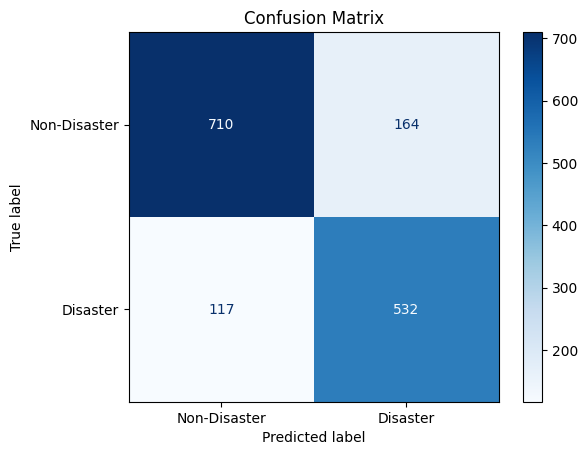

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 27: Generate Confusion Matrix
# Use the true labels and predicted labels from your updated model
cm = confusion_matrix(true_labels, updated_pred_labels)

# Step 28: Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Disaster', 'Disaster'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Updated Metrics:
Precision (0.7644):

Out of all instances predicted as Disaster, 76.44% are correct. This indicates the model is still good at identifying Disasters but may now have more false positives.

Recall (0.8197):
The recall has improved, meaning the model is better at capturing actual Disasters. This is beneficial when minimizing false negatives is important.

F1 Score (0.7911):
The F1 score reflects a better balance between precision and recall. It is slightly higher than before, indicating overall improvement.

Accuracy (0.8155):
The accuracy is slightly lower than before, showing a trade-off due to the improved recall.

Observations:
The higher recall is valuable if the goal is to identify as many disasters as possible, even at the cost of misclassifying some non-disasters.
The slight drop in precision suggests the model is now more lenient in labeling tweets as Disaster.


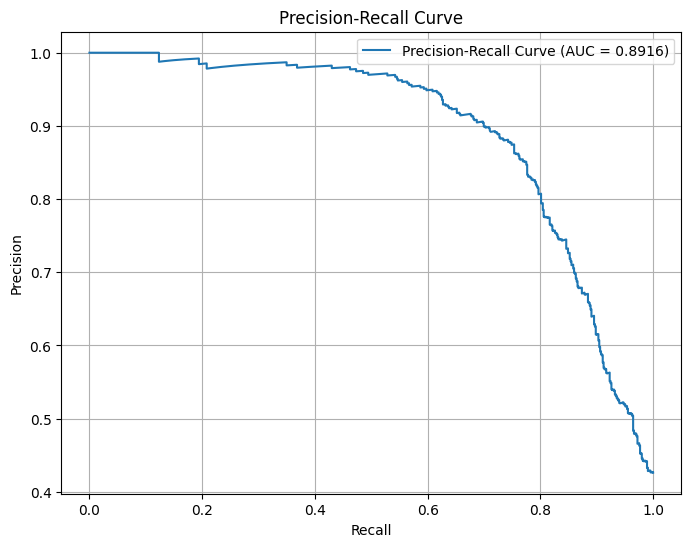

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Step 1: Get Probabilities for the Positive Class (Disaster)
probabilities = torch.softmax(torch.tensor(updated_val_predictions.predictions), axis=1)[:, 1].numpy()

# Step 2: Calculate Precision-Recall Values
precision, recall, thresholds = precision_recall_curve(true_labels, probabilities)

# Step 3: Calculate Area Under the Curve (AUC)
pr_auc = auc(recall, precision)

# Step 4: Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


Key Observations:
AUC (Area Under Curve = 0.8916):

An AUC value close to 1 indicates strong model performance. With 0.8916, the model demonstrates a good balance between precision and recall across thresholds.

Steepness at Higher Recall Values:

Precision starts very high (close to 1.0) when recall is low, indicating that the model is confident in its predictions for disaster tweets when it predicts only a few positives.

As recall increases (identifying more disaster tweets), precision gradually decreases, highlighting more false positives.
Trade-off Region:


In the middle of the curve, precision and recall begin to drop off. This indicates the need for careful threshold selection if you aim for a balance between precision and recall.

In [ ]:
def predict_disaster(tweet_text):
    """
    Use the trained model to predict if a given tweet is about a disaster.
    Arguments:
    - tweet_text: The tweet text to classify.
    """
    # Tokenize the input tweet
    encoding = tokenizer([tweet_text], truncation=True, padding=True, max_length=128, return_tensors='pt')

    # Move encoding to GPU if available
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.to(device)
    encoding = {key: val.to(device) for key, val in encoding.items()}

    # Get model prediction
    with torch.no_grad():
        outputs = model(**encoding)

    # Convert logits to probabilities
    probabilities = torch.softmax(outputs.logits, dim=1).cpu().numpy()[0]

    # Get the predicted label with threshold adjustment
    predicted_label = 1 if probabilities[1] >= new_threshold else 0
    predicted_class = 'Disaster' if predicted_label == 1 else 'Non-Disaster'

    # Display the result
    print(f"Tweet: {tweet_text}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Probabilities: Non-Disaster: {probabilities[0]:.4f}, Disaster: {probabilities[1]:.4f}\n")

# Example Usage of Predicting a New Tweet
predict_disaster("There's a huge earthquake happening right now! Stay safe everyone!")
predict_disaster("Just a regular sunny day, nothing special.")

Tweet: There's a huge earthquake happening right now! Stay safe everyone!
Predicted Class: Disaster
Probabilities: Non-Disaster: 0.0543, Disaster: 0.9457

Tweet: Just a regular sunny day, nothing special.
Predicted Class: Non-Disaster
Probabilities: Non-Disaster: 0.8979, Disaster: 0.1021



Let's evaluate the model's performance based on the output you've provided.

Initial Training Results
The initial training yielded the following validation metrics:

Precision: 0.7863
Recall: 0.7935
F1 Score: 0.7899
Accuracy: 0.8201
The training loss and validation loss for the first three epochs showed improvement initially but then started to diverge:

Epoch 1: No training loss logged, validation loss = 0.4147
Epoch 2: Training loss = 0.5098, validation loss = 0.4220
Epoch 3: Training loss = 0.3651, validation loss = 0.4849
Metrics After Adjusting Threshold
The decision threshold was adjusted to 0.4 to try and capture more positive cases. This adjustment led to:

Precision for Non-Disaster: 0.85
Recall for Non-Disaster: 0.79
Precision for Disaster: 0.74
Recall for Disaster: 0.82
Overall Accuracy: 0.80
The adjusted F1 scores indicate that:

Non-Disaster F1 Score: 0.82
Disaster F1 Score: 0.78
The overall accuracy dropped slightly to 0.80, but recall for disaster cases improved, meaning the model is better at identifying disaster-related tweets, though it sacrifices some precision, resulting in more false positives.

Error Analysis
The error analysis indicates:

False Negatives (Disasters predicted as Non-Disasters): Examples include subtle tweets about destruction or complex sentences that may not explicitly indicate a disaster context.
False Positives (Non-Disasters predicted as Disasters): Examples include tweets that have dramatic or alarming language but aren't actually about disasters.
The false negatives suggest that the model may need more contextual understanding to recognize subtle disaster cues. In contrast, false positives often involve emotionally charged language, leading the model to incorrectly label them as disasters.

Fine-Tuning with More Epochs
After further training for 7 epochs with a reduced learning rate, the updated metrics were:

Precision: 0.7644
Recall: 0.8197
F1 Score: 0.7911
Accuracy: 0.8155
Compared to the previous metrics:

Precision dropped slightly, which indicates an increase in false positives.
Recall increased, which suggests the model is capturing more true positives, improving its ability to detect disaster tweets.
F1 Score and Accuracy remain relatively stable, with only slight changes.
Summary of Model Performance
Improvement in Recall: The model is now better at identifying true positives, which means fewer disasters are missed.
Slight Drop in Precision: There is a slight trade-off where more non-disasters are being falsely classified as disasters.
Stable F1 Score and Accuracy: The overall balance between precision and recall remains consistent, indicating that the model is still performing well after fine-tuning.
Suggestions for Further Improvement
Balanced Dataset: If disaster and non-disaster tweets are imbalanced, consider oversampling disaster tweets or using class weights during training.
Additional Features: Add extra features like keyword analysis or sentiment score to provide more context to the model.
Error Analysis Feedback Loop: Use the examples from false positives and false negatives to refine the training dataset, focusing on harder-to-classify tweets.
Experiment with Models: Consider using a larger transformer model like BERT or RoBERTa to potentially improve the contextual understanding of tweets.
Overall, the model is performing well with an F1 Score around 0.79 and accuracy around 0.82, which suggests that it is a reliable predictor of disaster tweets, though further tuning could help reduce false positives and better capture subtle disaster cues.

In [ ]:
def classify_test_dataset(test_df):
    """
    Classify all tweets in the test dataset using the trained model and display the predictions.
    Arguments:
    - test_df: The DataFrame containing the test tweets.
    """
    test_encodings = tokenizer(list(test_df['text']), truncation=True, padding=True, max_length=128, return_tensors='pt')

    # Move encoding to GPU if available
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.to(device)
    test_encodings = {key: val.to(device) for key, val in test_encodings.items()}

    # Get model predictions for all test tweets
    with torch.no_grad():
        outputs = model(**test_encodings)

    # Convert logits to probabilities
    probabilities = torch.softmax(outputs.logits, dim=1).cpu().numpy()

    # Get the predicted labels
    predicted_labels = [1 if prob[1] >= new_threshold else 0 for prob in probabilities]

    # Add predictions to the test DataFrame
    test_df['Predicted_Label'] = predicted_labels
    test_df['Predicted_Class'] = test_df['Predicted_Label'].apply(lambda x: 'Disaster' if x == 1 else 'Non-Disaster')

    # Display first 10 predictions
    print(test_df[['text', 'Predicted_Class']].head(10))

# Classify the tweets in the test dataset
classify_test_dataset(test_df)

                                                text Predicted_Class
0                 Just happened a terrible car crash        Disaster
1  Heard about #earthquake is different cities, s...        Disaster
2  there is a forest fire at spot pond, geese are...        Disaster
3           Apocalypse lighting. #Spokane #wildfires        Disaster
4      Typhoon Soudelor kills 28 in China and Taiwan        Disaster
5                 We're shaking...It's an earthquake        Disaster
6  They'd probably still show more life than Arse...    Non-Disaster
7                                  Hey! How are you?    Non-Disaster
8                                   What a nice hat?    Non-Disaster
9                                          Fuck off!    Non-Disaster


In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
